In [1]:
from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Draw
from pkasolver.data import make_nodes, make_features_dicts
from pkasolver.constants import NODE_FEATURES, node_feat_values
from IPython.display import display
import torch

IPythonConsole.drawOptions.addAtomIndices = True
IPythonConsole.molSize = 500,500

import pandas as pd
pd.set_option('display.max_columns', None)
def color_positive_red(val):
    color = 'red' if val > 0 else 'black'
    return 'color: %s' % color

def feat_tensor_to_df(t,node_feat_list, node_feat_values):
    node_feat_names = []
    for feat in node_feat_list:
        values = node_feat_values[feat]
        for value in values:
            node_feat_names.append(f'{feat} = {value}')

    df = pd.DataFrame(t, columns= node_feat_names, dtype=int)
    return df.style.applymap(color_positive_red)

node_feat_list = [
    "smarts"   
]

Setting num threads to 1
Pytorch will use cuda


https://www.youtube.com/watch?v=3qzZbaUzo9M

In [61]:
sds = Chem.MolFromSmiles('CCCCCCCCCCCCOS(=O)(=O)[O-].[Na+]')
mol = sds
mol_nodes = make_nodes(mol, 33, make_features_dicts(NODE_FEATURES, node_feat_list))
print(mol_nodes.shape)

test_nodes =torch.zeros((mol_nodes.shape))
test_nodes[12:17,0] = 1
test_nodes[0:12,32] = 1
test_nodes[12,33] = 1
test_nodes[14:17,33] = 1

torch.equal(test_nodes, mol_nodes)

torch.Size([18, 36])


True

In [62]:
taurin = Chem.MolFromSmiles('C(CS(=O)(=O)O)N')
mol = taurin
mol_nodes = make_nodes(mol, 5, make_features_dicts(NODE_FEATURES, node_feat_list))
print(mol_nodes.shape)

test_nodes =torch.zeros((mol_nodes.shape[0],1))
test_nodes[1:6] = 1

torch.equal(mol_nodes[:,1:2], test_nodes)

torch.Size([7, 36])


True

In [63]:
Amoxicillin = Chem.MolFromSmiles('CC1([C@@H](N2[C@H](S1)[C@@H](C2=O)NC(=O)[C@@H](C3=CC=C(C=C3)O)N)C(=O)O)C')
mol = Amoxicillin
mol_nodes = make_nodes(mol, 23, make_features_dicts(NODE_FEATURES, node_feat_list))
print(mol_nodes.shape)

test_nodes =torch.zeros((mol_nodes.shape))
test_nodes[21:24,6] = 1
test_nodes[16,16] = 1
test_nodes[19,16] = 1
test_nodes[3,24] = 1
test_nodes[6:13,24] = 1
test_nodes[2,25] = 1
test_nodes[21:24,25] = 1
test_nodes[12,29] = 1
test_nodes[20,29] = 1
test_nodes[0,32] = 1
test_nodes[2,32] = 1
test_nodes[4,32] = 1
test_nodes[6,32] = 1
test_nodes[12,32] = 1
test_nodes[24,32] = 1
test_nodes[3,33] = 1
test_nodes[5,33] = 1
test_nodes[8:12,33] = 1
test_nodes[19:24,33] = 1
test_nodes[9,34] = 1
test_nodes[19:21,34] = 1
test_nodes[23,34] = 1


torch.equal(test_nodes, mol_nodes)

torch.Size([25, 36])


True

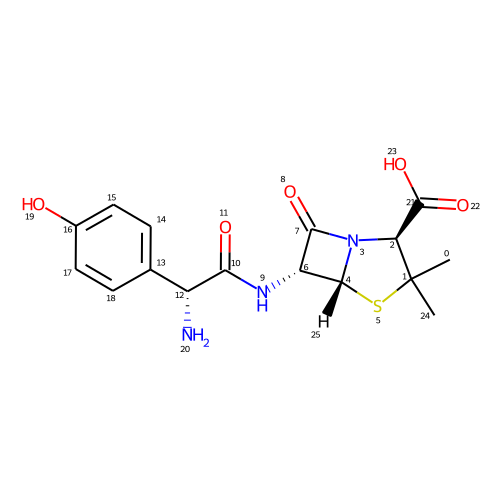

,smarts = -OSO3H,smarts = –SO3H,smarts = -OSO2H,smarts = -SO2H,smarts = -OPO3H2,smarts = -PO3H2,smarts = -CO2H,smarts = thiophenol,smarts = (-OPO3H)-,smarts = (-PO3H)-,smarts = phthalimide,smarts = CO3H (peracetyl),smarts = alpha-carbon-hydrogen-nitro group,smarts = -SO2NH2,smarts = -OBO2H2,smarts = -BO2H2,smarts = phenol,smarts = SH (aliphatic),smarts = (-OBO2H)-,smarts = (-BO2H)-,smarts = cyclopentadiene,smarts = -CONH2,smarts = imidazole,smarts = -OH (aliphatic alcohol),smarts = alpha-carbon-hydrogen-keto group,smarts = alpha-carbon-hydrogen-acetyl ester group,smarts = sp carbon hydrogen,smarts = alpha-carbon-hydrogen-sulfone group,smarts = alpha-carbon-hydrogen-sulfoxide group,smarts = -NH2,smarts = benzyl hydrogen,smarts = sp2-carbon hydrogen,smarts = sp3-carbon hydrogen,smarts = Hydrogen-bond acceptor,smarts = Hydrogen-bond donor,smarts = Possible intramolecular H-bond
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0
7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0


In [38]:
display(mol)
feat_tensor_to_df(mol_nodes, node_feat_list, node_feat_values)
